<a href="https://colab.research.google.com/github/vikpy/covid19_crime_relation/blob/master/covid19_crime_relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visual Analysis of Chicago COVID19 cases and Crime data**

**Is there a relation between Covid19 outbreak and Crime Rate? Let's Explore!!!**



## **1. COVID19 Analysis of Chicagoland**

We first analyse the overall covid19 cases in Chicagoland 



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Importing Dataset
df_covid=pd.read_csv('/content/chicago_covid_19.csv')
df_covid.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,Unnamed: 72
0,84017031,US,USA,840,17031,Cook,Illinois,US,41.841448,-87.816588,"Cook, Illinois, US",1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4,4,4,5,5,6,7,7,11,22,27,40,50,50,62,107,178,278,278,548,805,922,1194,1418,1418,2239,2613,3445,3727,Cook
1,84017043,US,USA,840,17043,DuPage,Illinois,US,41.851170,-88.086427,"DuPage, Illinois, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,26,45,54,54,65,79,95,103,131,131,199,202,274,320,DuPage
2,84017063,US,USA,840,17063,Grundy,Illinois,US,41.285696,-88.419057,"Grundy, Illinois, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3,Grundy
3,84017089,US,USA,840,17089,Kane,Illinois,US,41.938427,-88.428614,"Kane, Illinois, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,4,3,4,6,6,8,13,18,24,38,38,75,90,100,113,Kane
4,84017091,US,USA,840,17091,Kankakee,Illinois,US,41.137470,-87.862053,"Kankakee, Illinois, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,6,6,17,27,33,33,Kankakee


In [0]:
#Taking required columns from dataset
x=df_covid.iloc[:,11:-1]
x.head()

,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4,4,4,5,5,6,7,7,11,22,27,40,50,50,62,107,178,278,278,548,805,922,1194,1418,1418,2239,2613,3445,3727
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,26,45,54,54,65,79,95,103,131,131,199,202,274,320
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,4,3,4,6,6,8,13,18,24,38,38,75,90,100,113
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,6,6,17,27,33,33


In [0]:
#Transpose the data
data=x.T
data.columns=df_covid['Combined_Key']
#Converting to pandas Datetime format
data.index=pd.to_datetime(data.index, format='%m/%d/%Y', errors='ignore')
data.head()

Combined_Key,"Cook, Illinois, US","DuPage, Illinois, US","Grundy, Illinois, US","Kane, Illinois, US","Kankakee, Illinois, US","Kendall, Illinois, US","Lake, Illinois, US","McHenry, Illinois, US","Will, Illinois, US","Lake, Indiana, US","LaPorte, Indiana, US","Porter, Indiana, US"
2020-01-30,1,0,0,0,0,0,0,0,0,0,0,0
2020-01-31,2,0,0,0,0,0,0,0,0,0,0,0
2020-02-01,2,0,0,0,0,0,0,0,0,0,0,0
2020-02-02,2,0,0,0,0,0,0,0,0,0,0,0
2020-02-03,2,0,0,0,0,0,0,0,0,0,0,0


In [0]:
!pip install plotly-geo
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

     |████████████████████████████████| 23.7MB 1.6MB/s 
     |████████████████████████████████| 890kB 1.4MB/s 
     |████████████████████████████████| 14.7MB 5.2MB/s 
     |████████████████████████████████| 10.4MB 202kB/s 
     |████████████████████████████████| 184kB 1.4MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-cp36-none-any.whl size=20467 sha256=9c50a43a4ef6a6a1da22d93db538aaa7e1624dc36bd3971e736106fc57f926c9
  Stored in directory: /root/.cache/pip/wheels/ba/1a/67/6a12977f362c33a15edc753daf92c6f01879dbf4db76faf0dd
Successfully built pyshp
     |████████████████████████████████| 1.5MB 1.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    Uninstalling Shapely-1.7.0:
      Successfully uninstalled Shapely-1.7.0


In [0]:
import plotly.figure_factory as ff
import numpy as np
import pandas as pd

values = df_covid['3/30/2020']
fips = df_covid['FIPS'].to_list()
endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#F6BDC0", "#F1959B", "#F07470","#EA4C46" , "#DC1C13"]

fig = ff.create_choropleth(
    title="Chicagoland Covid19 Cases as on 1st April 2020",
    fips=fips, values=values, scope=["Chicago"], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(255,255,255)',
    legend_title='Cases in Chicago by County',
    county_outline={'color': 'rgb(255,255,255)'},
    exponent_format=True
)
fig.layout.template = None
fig.show()


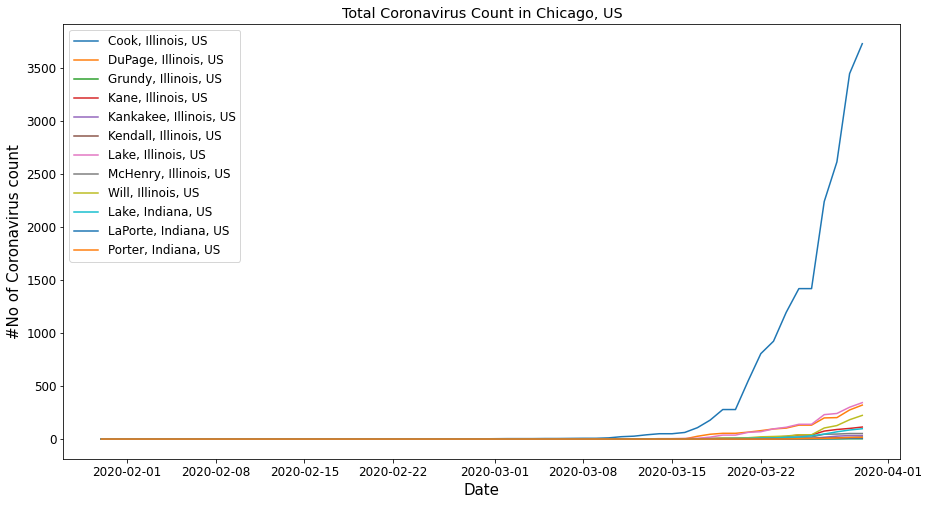

In [0]:
import matplotlib.pyplot as plt
from pylab import rcParams
plt.rcParams.update({'font.size': 12})
rcParams['figure.figsize'] = 15, 8
x = data.index
for i in range(len(data.columns)):
  plt.plot(x, data.iloc[:,i], label = data.columns[i])
plt.xlabel('Date',fontsize=15)
plt.ylabel('#No of Coronavirus count',fontsize=15)
plt.title('Total Coronavirus Count in Chicago, US')
plt.legend()
plt.show()

**Thus, Cook has the highest number of cases as well as highest growth of cases. Cook is also the county where Chicago city is located.**

## **1. Analysis of Crimes in City of Chicago between 30th January to March 31**

We analyse the how the crime pattern is between the period 30th January(Approximately the starting of Covid19 cases) and March 31st (Arbritary date for analysis)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

crimes1 = pd.read_csv('/content/drive/My Drive/python_project/crimes_2015.csv',error_bad_lines=False)
crimes2 = pd.read_csv('/content/drive/My Drive/python_project/crimes_2016.csv',error_bad_lines=False)
crimes3 = pd.read_csv('/content/drive/My Drive/python_project/crimes_2017.csv',error_bad_lines=False)
crimes4 = pd.read_csv('/content/drive/My Drive/python_project/crimes_2018.csv',error_bad_lines=False)
crimes5 = pd.read_csv('/content/drive/My Drive/python_project/crimes_2019.csv',error_bad_lines=False)
crimes6 = pd.read_csv('/content/drive/My Drive/python_project/crimes_2020.csv',error_bad_lines=False)

crimes = pd.concat([crimes1, crimes2, crimes3,crimes4, crimes5, crimes6], ignore_index=False, axis=0)

del crimes1
del crimes2
del crimes3
del crimes4
del crimes5
del crimes6


print('Dataset ready..')

print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

Dataset ready..
Dataset Shape before drop_duplicate :  (231061, 22)
Dataset Shape after drop_duplicate:  (231061, 22)


In [0]:
crimes.drop(['Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

In [0]:
crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,10009541,01/30/2015 12:00:00 AM,038XX W 26TH ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,10,1151013.0,1886445.0,41.844294,-87.721303
1,9945881,01/30/2015 12:00:00 AM,066XX N SEELEY AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,24,1161426.0,1944113.0,42.002329,-87.681480
2,9946453,01/30/2015 12:00:00 AM,111XX S EMERALD AVE,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,DAY CARE CENTER,False,False,22,1173302.0,1830977.0,41.691618,-87.641144
3,9960959,01/30/2015 12:00:00 AM,057XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,8,1155361.0,1866428.0,41.789278,-87.705883
4,9961070,01/30/2015 12:00:00 AM,038XX N SAYRE AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,16,1129053.0,1924805.0,41.949960,-87.801020


In [0]:
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)

In [0]:
crimes.shape

(231061, 13)

In [0]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 231061 entries, 2015-01-30 00:00:00 to 2020-03-25 23:50:00
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    231061 non-null  int64         
 1   Date                  231061 non-null  datetime64[ns]
 2   Block                 231061 non-null  object        
 3   Primary Type          231061 non-null  object        
 4   Description           231061 non-null  object        
 5   Location Description  230167 non-null  object        
 6   Arrest                231061 non-null  bool          
 7   Domestic              231061 non-null  bool          
 8   District              231061 non-null  int64         
 9   X Coordinate          229228 non-null  float64       
 10  Y Coordinate          229228 non-null  float64       
 11  Latitude              229228 non-null  float64       
 12  Longitude             22

In [0]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'

In [0]:
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

In [0]:
import plotly.express as px
month = ["Jan", "Feb", "Mar"]
df_temp  = crimes.iloc[:,:]
# Splitting the data into day, month, year 
df_temp["Date"] = pd.to_datetime(df_temp["Date"])
df_temp["day"] = df_temp['Date'].map(lambda x: x.day)
df_temp["month"] = df_temp['Date'].map(lambda x: x.month)
df_temp["year"] = df_temp['Date'].map(lambda x: x.year)
df_temp["month-day"] = df_temp["month"].astype(str) + df_temp["day"].astype(str)
df_year_crimes =  df_temp[["ID", "year", "month-day"]].groupby(["year", "month-day"]).count().reset_index()
df_year_crimes["month"] = df_year_crimes["month-day"].apply(lambda x : int(x[0]) )
df_year_crimes["day"] = df_year_crimes["month-day"].apply(lambda x : int(x[1:]) )
df_year_crimes = df_year_crimes.sort_values(by=["month", "day"])
df_year_crimes.rename(columns={"ID": "Number of Crimes" }, inplace=True)
df_year_crimes["month-day"] = df_year_crimes["month-day"].apply(lambda x : month[int(x[0]) - 1] + "-" + x[1:] )
df_year_crimes = df_year_crimes[df_year_crimes["month-day"] != "Feb-29"]
df_year_crimes = df_year_crimes[df_year_crimes["month-day"] != "Mar-26"]
df_year_crimes = df_year_crimes[df_year_crimes["month-day"] != "Mar-27"]
df_year_crimes = df_year_crimes[df_year_crimes["month-day"] != "Mar-28"]
df_year_crimes = df_year_crimes[df_year_crimes["month-day"] != "Mar-29"]
df_year_crimes = df_year_crimes[df_year_crimes["month-day"] != "Mar-30"]
df_year_crimes = df_year_crimes[df_year_crimes["month-day"] != "Mar-31"]
fig = px.line(df_year_crimes, x="month-day", y="Number of Crimes",line_group="year",color="year", title='Number of Crimes in Chicago')
fig.show()


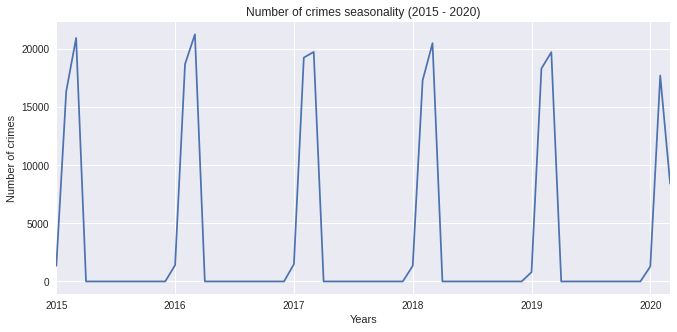

In [0]:
plt.figure(figsize=(11,5))
crimes[crimes["Date"] <= "2020-03-15"].resample('M').size().plot(legend=False)
plt.title('Number of crimes seasonality (2015 - 2020)')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()

This chart shows a clear "periodic" pattern in the crimes over many years. I guess this very periodic pattern is an essential part of why crime a very predictable activity!. However the size of the peak is reducing in the year 2020

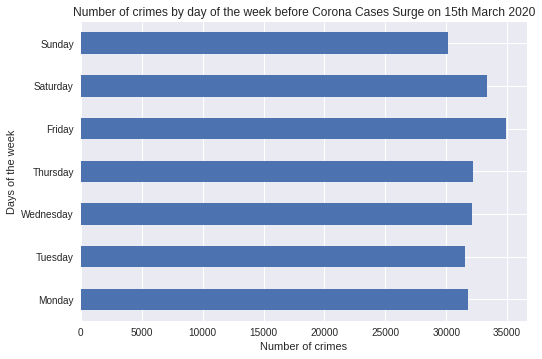

In [0]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes[crimes["Date"] < "2020-03-15"].groupby([crimes[crimes["Date"] < "2020-03-15"].index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week before Corona Cases Surge on 15th March 2020')
plt.show()

Friday has higher number of crime than other days during normal times 


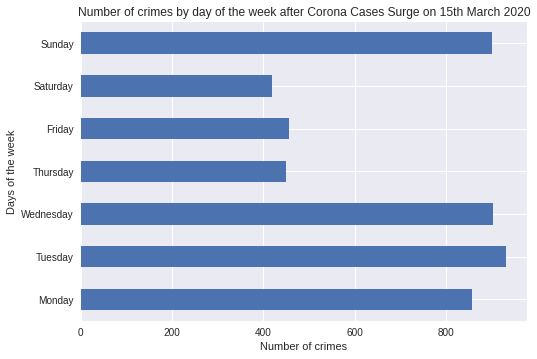

In [0]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes[crimes["Date"] >= "2020-03-15"].groupby([crimes[crimes["Date"] >= "2020-03-15"].index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week after Corona Cases Surge on 15th March 2020')
plt.show()

After the Surge in the cases, Tuesdays become the days on which more crimes are committed 

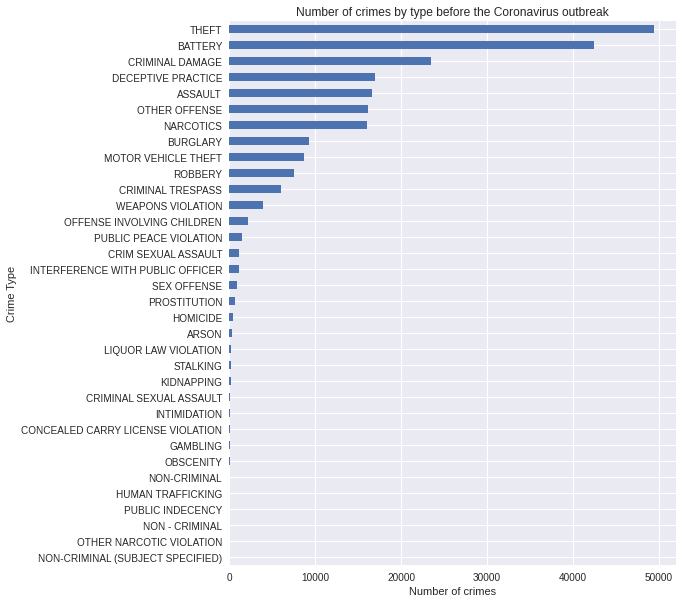

In [0]:
plt.figure(figsize=(8,10))
crimes[crimes["Date"] < "2020-03-15"].groupby([crimes[crimes["Date"] < "2020-03-15"]['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type before the Coronavirus outbreak')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

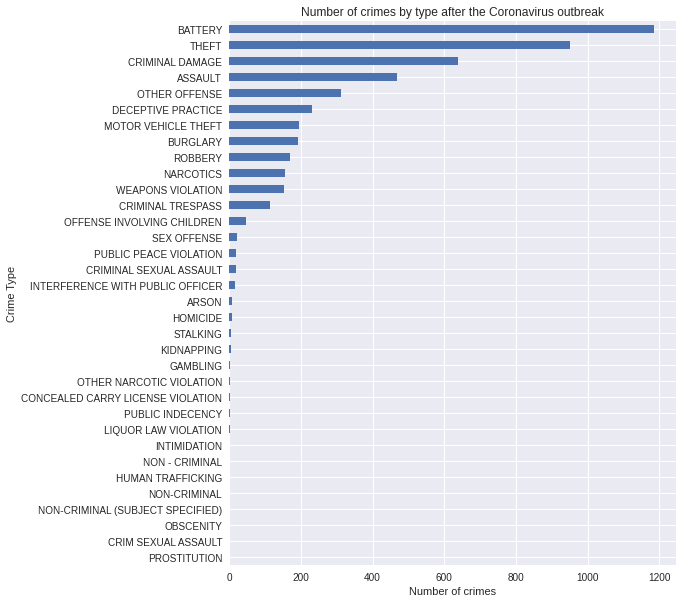

In [0]:
plt.figure(figsize=(8,10))
crimes[crimes["Date"] >= "2020-03-15"].groupby([crimes[crimes["Date"] >= "2020-03-15"]['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type after the Coronavirus outbreak')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

1. Theft, battery and Criminal damage remain the top 3 crimes in both the durations
2. Battery related crimes picked up to be on top of the chart during the outbreak period

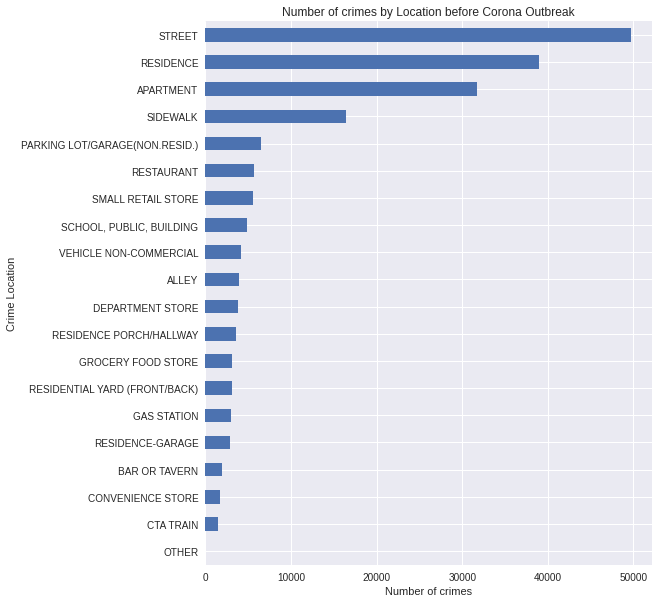

In [0]:
plt.figure(figsize=(8,10))
crime_temp = crimes[crimes['Location Description'] != "OTHER"]
crime_temp[crime_temp["Date"] < "2020-03-15"].groupby([crime_temp[crime_temp["Date"] < "2020-03-15"]['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location before Corona Outbreak')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

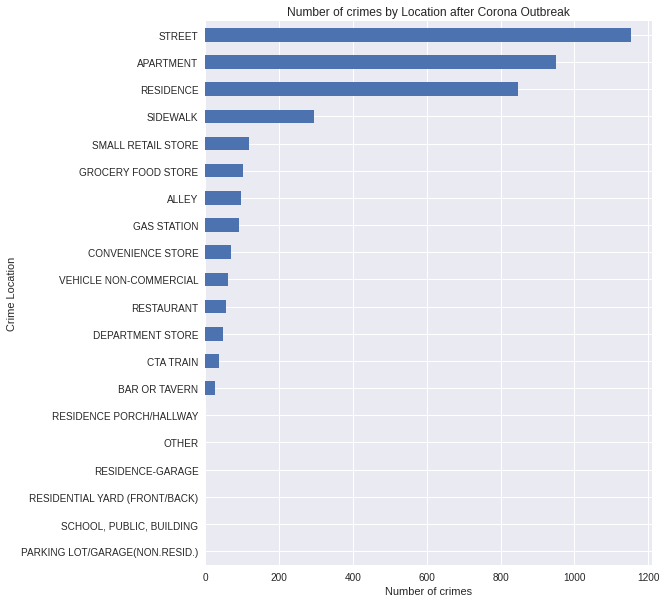

In [0]:
plt.figure(figsize=(8,10))
crime_temp = crimes[crimes['Location Description'] != "OTHER"]
crime_temp[crime_temp["Date"] >= "2020-03-15"].groupby([crime_temp[crime_temp["Date"] >= "2020-03-15"]['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location after Corona Outbreak')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

1. Streets, residence and apartments continue to remain the top crime locations before and after analysis 
2. However, after the outbreak, Apartment reach the position two as crime spot

In [0]:
hour_by_location_before = crimes[crimes["Date"] < "2020-03-15"].pivot_table(values='ID', index='Location Description', columns=crimes[crimes["Date"] < "2020-03-15"].index.hour, aggfunc=np.size).fillna(0)
hour_by_type_before     = crimes[crimes["Date"] < "2020-03-15"].pivot_table(values='ID', index='Primary Type', columns=crimes[crimes["Date"] < "2020-03-15"].index.hour, aggfunc=np.size).fillna(0)
#hour_by_week_before     = crimes[crimes["Date"] < "2020-03-15"].pivot_table(values='ID', index=crimes[crimes["Date"] < "2020-03-15"].index.hour, columns=crimes[crimes["Date"] < "2020-03-15"].index.weekday_name, aggfunc=np.size).fillna(0)
#hour_by_week_before     = hour_by_week_before[days].T 
dayofweek_by_location_before = crimes[crimes["Date"] < "2020-03-15"].pivot_table(values='ID', index='Location Description', columns=crimes[crimes["Date"] < "2020-03-15"].index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type_before = crimes[crimes["Date"] < "2020-03-15"].pivot_table(values='ID', index='Primary Type', columns=crimes[crimes["Date"] < "2020-03-15"].index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type_before  = crimes[crimes["Date"] < "2020-03-15"].pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)


hour_by_location_after = crimes[crimes["Date"] >="2020-03-15"].pivot_table(values='ID', index='Location Description', columns=crimes[crimes["Date"] >= "2020-03-15"].index.hour, aggfunc=np.size).fillna(0)
hour_by_type_after    = crimes[crimes["Date"] >="2020-03-15"].pivot_table(values='ID', index='Primary Type', columns=crimes[crimes["Date"] >="2020-03-15"].index.hour, aggfunc=np.size).fillna(0)
#hour_by_week_after     = crimes[crimes["Date"] >="2020-03-15"].pivot_table(values='ID', index=crimes[crimes["Date"] >="2020-03-15"].index.hour, columns=crimes[crimes["Date"] >="2020-03-15"].index.weekday_name, aggfunc=np.size).fillna(0)
#hour_by_week_after     = hour_by_week_after[days].T 
dayofweek_by_location_after = crimes[crimes["Date"] >="2020-03-15"].pivot_table(values='ID', index='Location Description', columns=crimes[crimes["Date"] >="2020-03-15"].index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type_after = crimes[crimes["Date"] >="2020-03-15"].pivot_table(values='ID', index='Primary Type', columns=crimes[crimes["Date"] >="2020-03-15"].index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type_after  = crimes[crimes["Date"] >="2020-03-15"].pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

In [0]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr', title="", xlabel="", ylabel=""):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def scale_and_plot(df, ix = None, title="", xlabel="", ylabel="", cmap='bwr'):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.to_numpy()), np.abs(np.min(df_marginal_scaled.to_numpy()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix, cmap=cmap, title=title, xlabel=xlabel, ylabel=ylabel)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

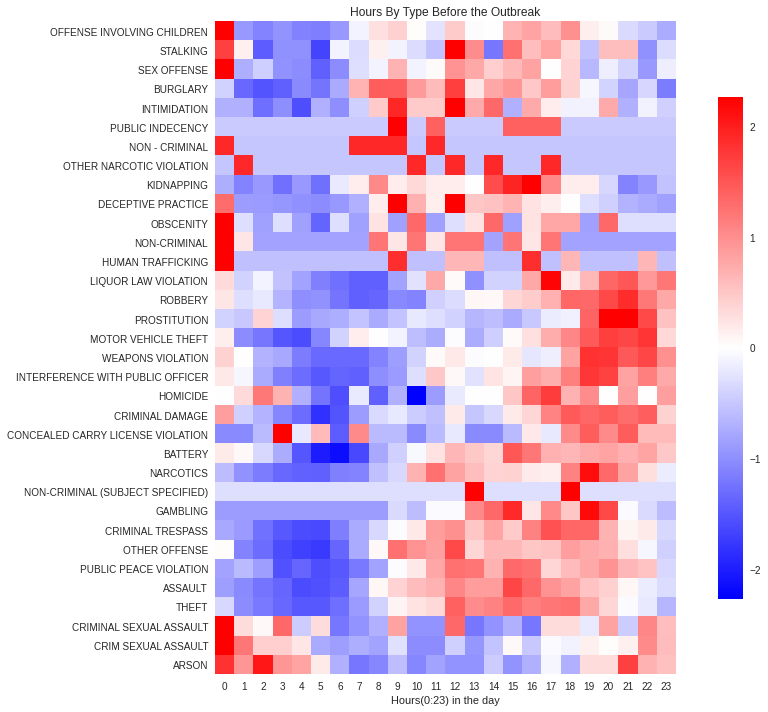

In [0]:
# Before the Out Break
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type_before, title="Hours By Type Before the Outbreak", xlabel="Hours(0:23) in the day")

ERROR! Session/line number was not unique in database. History logging moved to new session 61


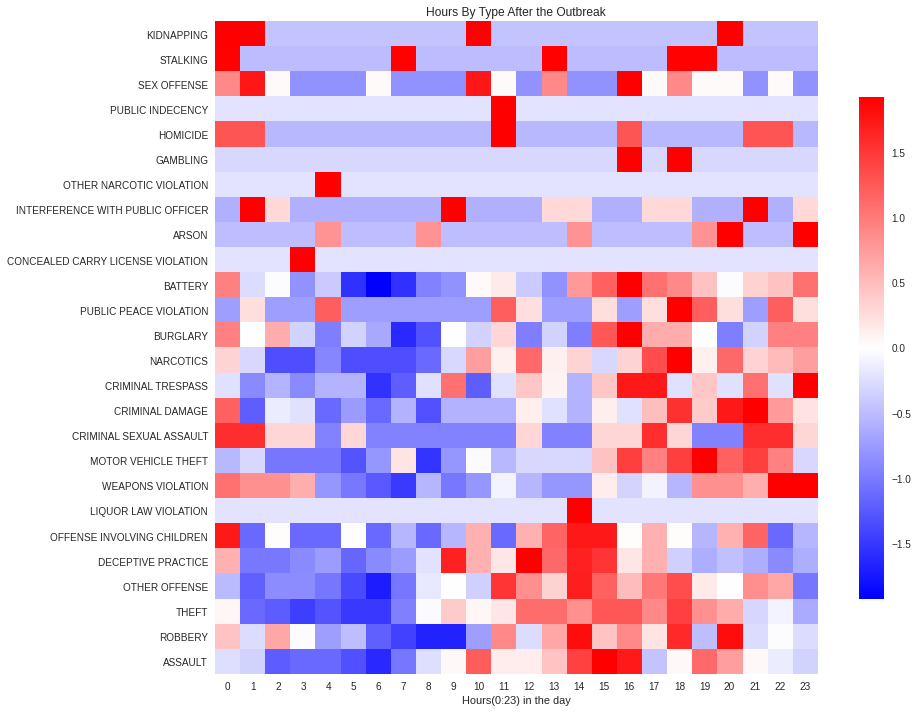

In [0]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type_after, title="Hours By Type After the Outbreak", xlabel="Hours(0:23) in the day")

1. LIQUOR LAW VIOLATION has been limited to 14th hour of the day that is 2pm.
2. Most crimes have been pretty active during 10:00 - 22:00
3. Criminal damage is observed to be the highest between 18:00 - 21:00


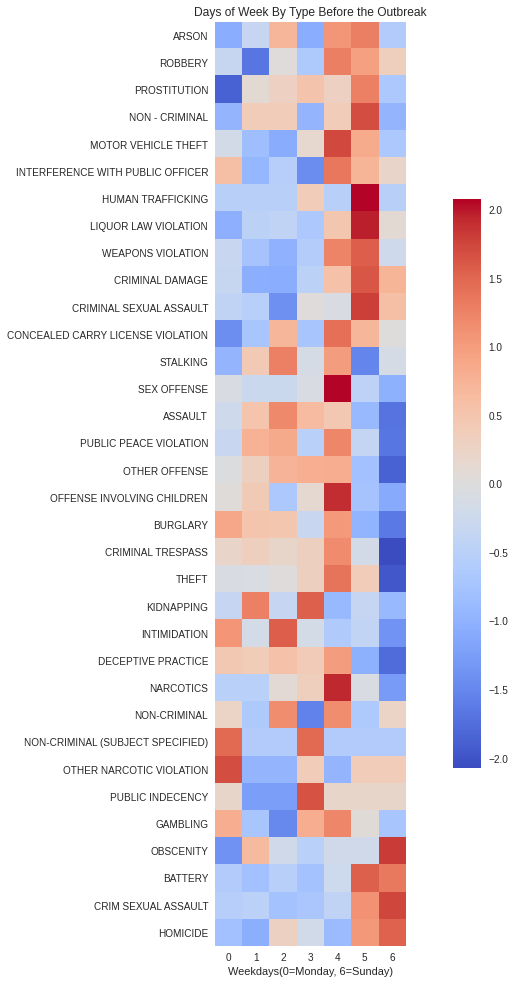

In [0]:
plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type_before, title="Days of Week By Type Before the Outbreak", xlabel="Weekdays(0=Monday, 6=Sunday)",cmap='coolwarm')

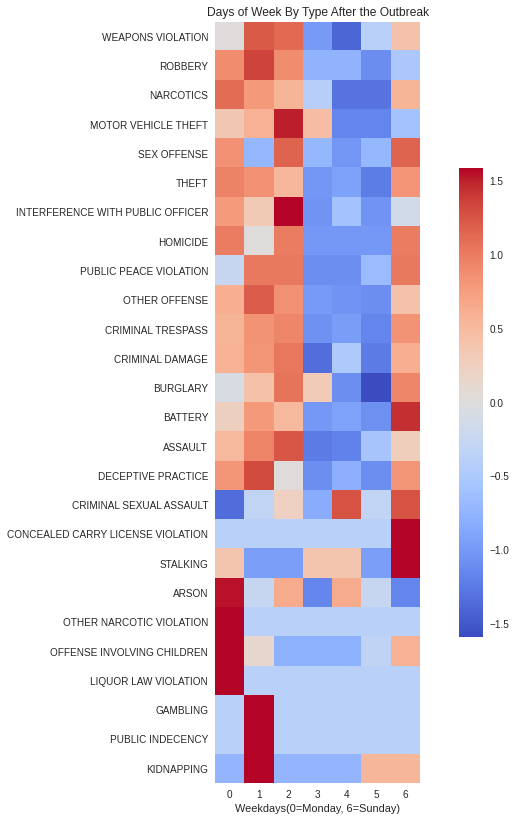

In [0]:
plt.figure(figsize=(14,14))
scale_and_plot(dayofweek_by_type_after, title="Days of Week By Type After the Outbreak", xlabel="Weekdays(0=Monday, 6=Sunday)",cmap='coolwarm')

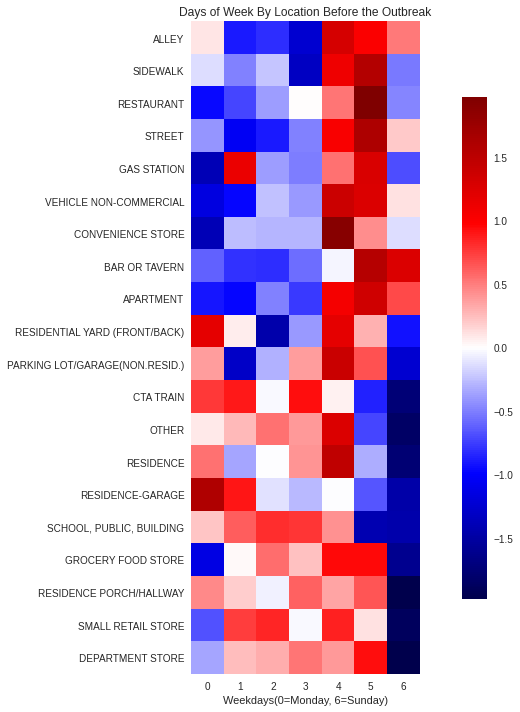

In [0]:
plt.figure(figsize=(15,12))
scale_and_plot(dayofweek_by_location_before, title="Days of Week By Location Before the Outbreak", xlabel="Weekdays(0=Monday, 6=Sunday)", cmap="seismic")

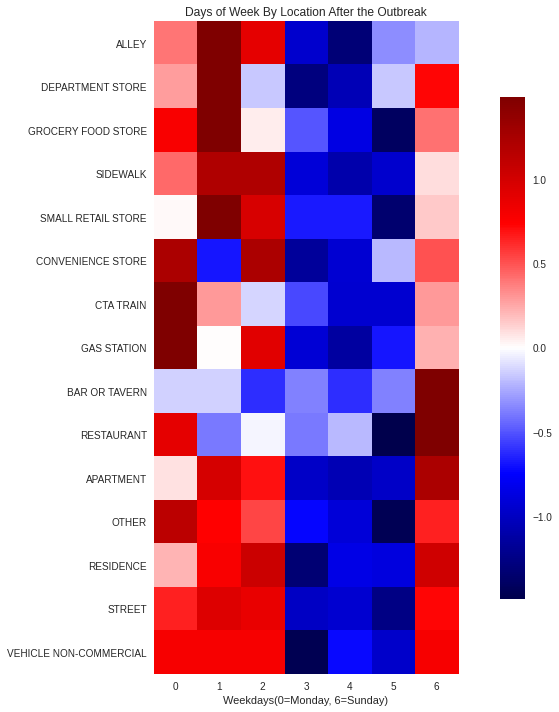

In [0]:
plt.figure(figsize=(15,12))
scale_and_plot(dayofweek_by_location_after, title="Days of Week By Location After the Outbreak", xlabel="Weekdays(0=Monday, 6=Sunday)", cmap="seismic")

1. Crime pattern for apartment, residence has significantly changed. These crimes are more prevelent during the beginning of the week now.
2. Sundays appear to be relatively the cleanest day of the week in terms of crime rate in before the ourbreak period
3. However, post corona outbreak there's a surge in crimes during Sundays


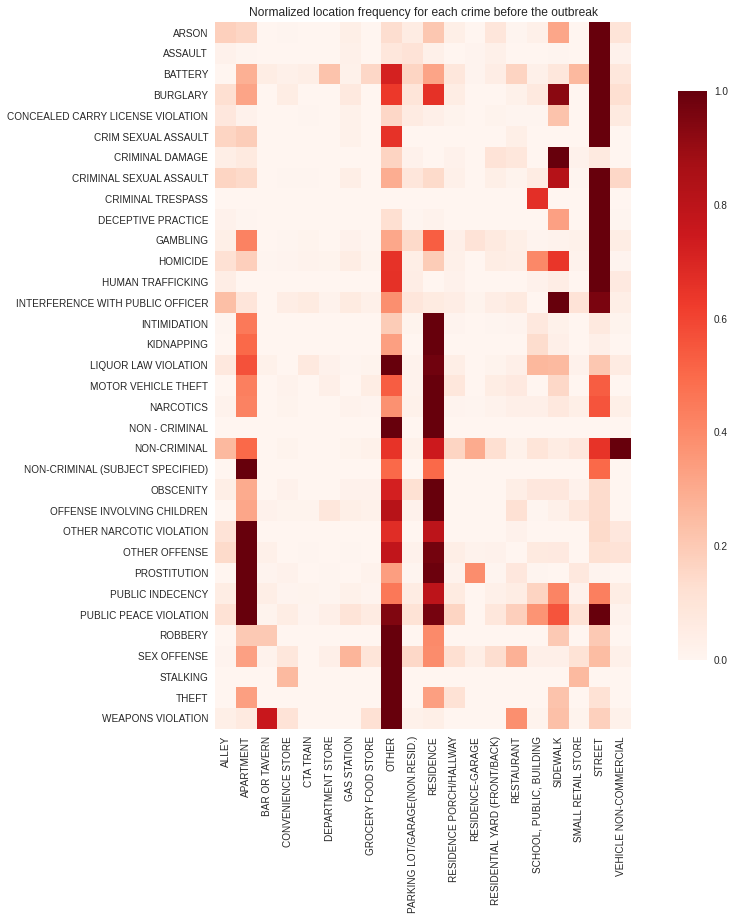

In [0]:
df = normalize(location_by_type_before)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime before the outbreak')
plt.grid(False)
plt.show()

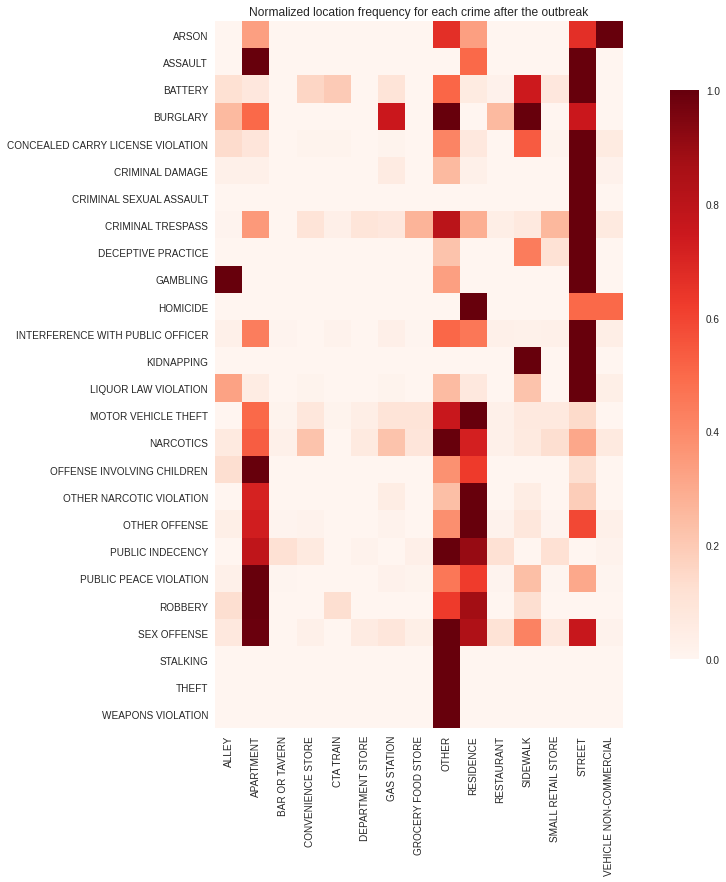

In [0]:
df = normalize(location_by_type_after)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime after the outbreak')
plt.grid(False)
plt.show()

In [0]:
df_temp  = crimes[crimes["Date"] < "2020-03-15"].iloc[:,:]
# Splitting the data into day, month, year 
df_temp["Date"] = pd.to_datetime(df_temp["Date"])
df_temp["day"] = df_temp['Date'].map(lambda x: x.day)
df_year_crimes =  df_temp[["ID", "Primary Type", "day"]].groupby(["Primary Type", "day"]).count().reset_index()
df_year_crimes = df_year_crimes.sort_values(by=["day"])
df_year_crimes.rename(columns={"ID": "Number of Crimes" }, inplace=True)
fig = px.line(df_year_crimes, x="day", y="Number of Crimes",line_group="Primary Type",color="Primary Type", title='Day wise Crimes Before the Outbreak for different Crime Types')
fig.show()


In [0]:
df_temp  = crimes[crimes["Date"] >= "2020-03-15"].iloc[:,:]
# Splitting the data into day, month, year 
df_temp["Date"] = pd.to_datetime(df_temp["Date"])
df_temp["day"] = df_temp['Date'].map(lambda x: x.day)
df_year_crimes =  df_temp[["ID", "Primary Type", "day"]].groupby(["Primary Type", "day"]).count().reset_index()
df_year_crimes = df_year_crimes.sort_values(by=["day"])
df_year_crimes.rename(columns={"ID": "Number of Crimes" }, inplace=True)
fig = px.line(df_year_crimes, x="day", y="Number of Crimes",line_group="Primary Type",color="Primary Type", title='Day wise Crimes After the Outbreak for different Crime Types')
fig.show()

In [0]:
df_temp  = crimes[crimes["Date"] < "2020-03-15"].iloc[:,:]
# Splitting the data into day, month, year 
df_temp["Date"] = pd.to_datetime(df_temp["Date"])
df_temp["day"] = df_temp['Date'].map(lambda x: x.day)
df_year_crimes =  df_temp[["ID", "Location Description", "day"]].groupby(["Location Description", "day"]).count().reset_index()
df_year_crimes = df_year_crimes.sort_values(by=["day"])
df_year_crimes.rename(columns={"ID": "Number of Crimes" }, inplace=True)
fig = px.line(df_year_crimes, x="day", y="Number of Crimes",line_group="Location Description",color="Location Description", title='Day wise Crimes Before the Outbreak for different Locations')
fig.show()

In [0]:
df_temp  = crimes[crimes["Date"] >= "2020-03-15"].iloc[:,:]
# Splitting the data into day, month, year 
df_temp["Date"] = pd.to_datetime(df_temp["Date"])
df_temp["day"] = df_temp['Date'].map(lambda x: x.day)
df_year_crimes =  df_temp[["ID", "Location Description", "day"]].groupby(["Location Description", "day"]).count().reset_index()
df_year_crimes = df_year_crimes.sort_values(by=["day"])
df_year_crimes.rename(columns={"ID": "Number of Crimes" }, inplace=True)
fig = px.line(df_year_crimes, x="day", y="Number of Crimes",line_group="Location Description",color="Location Description", title='Day wise Crimes After the Outbreak for different Locations')
fig.show()